In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos 5 segundos.csv')
datatest = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos test.csv')


#Separa X e Y del dataset
X = data.iloc[:, 1:3].values
Y = np.zeros(len(data))

X_test = datatest.values


In [3]:
x_aux=X
x_test_aux=X_test

x_train = np.reshape(x_aux[0:16640], (65, 256, 2)) 
new_x_test = np.reshape(x_test_aux[0:3840], (15, 256, 2))

Y = np.zeros(65)
Y[6]=1
Y[11]=1
Y[16]=1
Y[21]=1
Y[22]=1
Y[27]=1
Y[32]=1
Y[37]=1
Y[38]=1
Y[43]=1
Y[48]=1
Y[53]=1
Y[58]=1
Y[64]=1

Y_test =  np.zeros(15)
Y_test[1]=1
Y_test[3]=1
Y_test[5]=1
Y_test[8]=1
Y_test[9]=1
Y_test[10]=1
Y_test[13]=1


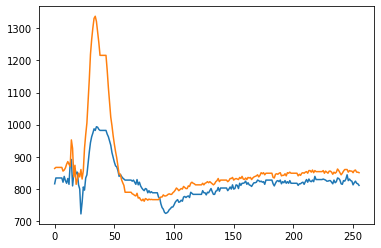

In [4]:
# Analisis visual de los bloques que contienen pestaneos
plt.plot(new_x_test[3])

# Bloques identidficados con pestaneos
#train 6 11 16 21 22 27 32 37 38 43 48 53 58 64
#test 1 3 5 8 9 10 13

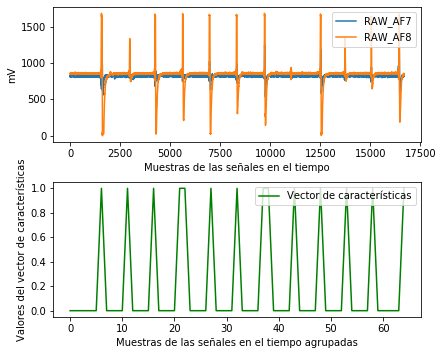

In [5]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("mV")


plt.subplot(212)
[y]=plt.plot(Y, 'g')
plt.legend([y], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo agrupadas")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()


In [6]:
print(x_train.shape)
new_x_test
x_train

(65, 256, 2)


array([[[810.9753 , 847.16486],
        [817.55524, 852.0998 ],
        [809.3303 , 848.8099 ],
        ...,
        [822.4902 , 858.67975],
        [810.9753 , 848.8099 ],
        [812.6203 , 852.0998 ]],

       [[812.6203 , 852.0998 ],
        [812.6203 , 852.0998 ],
        [812.6203 , 852.0998 ],
        ...,
        [822.4902 , 863.6147 ],
        [810.9753 , 861.9697 ],
        [810.9753 , 861.9697 ]],

       [[810.9753 , 861.9697 ],
        [810.9753 , 861.9697 ],
        [810.9753 , 861.9697 ],
        ...,
        [827.4251 , 857.0347 ],
        [820.8452 , 853.7448 ],
        [815.9103 , 852.0998 ]],

       ...,

       [[820.8452 , 857.0347 ],
        [809.3303 , 855.3898 ],
        [807.68536, 852.0998 ],
        ...,
        [817.55524, 858.67975],
        [817.55524, 858.67975],
        [817.55524, 858.67975]],

       [[824.13513, 861.9697 ],
        [817.55524, 858.67975],
        [806.04034, 848.8099 ],
        ...,
        [822.4902 , 858.67975],
        [820.8452 

In [13]:
from keras.layers import Dense, Dropout, CuDNNLSTM, Embedding, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(256,input_shape=(256, 2), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='relu'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(x_train, Y, epochs = 50, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256, 256)          265216    
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 408,117
Trainable params: 408,117
Non-trainable params: 0
_________________________________________________________________
Train on 58 samples, validate on 7 samples
Epoch 1/50
 - 3s - loss: 1.3864 - acc: 0.7931 - val_loss: 0.7688 - val_acc: 0.2857

Epoch 00001: val_loss improved from inf to 0.76882, saving model to LSTM.weights.best.hdf5
Epoch 2/50
 - 1s - loss: 0.8012 - acc: 0.1724 - val_loss: 0.6295 - val_acc: 0.2857

Epoch 00002: val_loss improved from 0.76882 to 0.62950, saving model to LSTM.weights.best.hdf5
Epo


Epoch 00050: val_loss did not improve from 0.00000


In [14]:
from sklearn import metrics
score = model.evaluate(new_x_test, Y_test, verbose=1)
print("Accuracy: ", score[1])

predict =  [1 if a>0.5 else 0 for a in model.predict(new_x_test)]

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predict), metrics.precision_score(Y_test, predict),metrics.recall_score(Y_test, predict),metrics.f1_score(Y_test, predict)))

15/15 [==============================] - 0s 8ms/step
Accuracy:  0.6666666865348816
Accuracy = 0.6666666666666666
Precision = 1.0
Recall = 0.2857142857142857
F1 Score = 0.4444444444444445


In [15]:
from scipy import stats
print(stats.describe(model.predict(new_x_test)))


DescribeResult(nobs=15, minmax=(array([0.], dtype=float32), array([1.433364], dtype=float32)), mean=array([0.177532], dtype=float32), variance=array([0.15333639], dtype=float32), skewness=array([2.4586642], dtype=float32), kurtosis=array([5.2229233], dtype=float32))


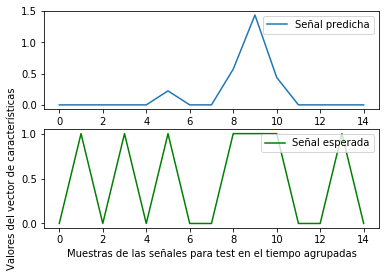

In [16]:
plt.figure()

plt.subplot(211)
[a] = plt.plot(model.predict(new_x_test))
plt.legend([a], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo agrupadas")

plt.subplot(212)
[y_test]=plt.plot(Y_test, 'g')
plt.legend([y_test], ["Señal esperada"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo agrupadas")
plt.ylabel("Valores del vector de características")

plt.show()